# Projeto Integrador
## Grupo 4

### Mariana, Marcello, Murilo

In [67]:
#Carrega Bibliotecas
import pandas as pd
import missingno as msno
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [40]:
#Import csv file
df = pd.read_csv("cs_bisnode_panel.csv")

Visualização do DataFrame

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   begin                 287829 non-null  object 
 2   end                   287829 non-null  object 
 3   COGS                  18257 non-null   float64
 4   amort                 279789 non-null  float64
 5   curr_assets           287698 non-null  float64
 6   curr_liab             287698 non-null  float64
 7   extra_exp             269300 non-null  float64
 8   extra_inc             269300 non-null  float64
 9   extra_profit_loss     270626 non-null  float64
 10  finished_prod         17485 non-null   float64
 11  fixed_assets          287698 non-null  float64
 12  inc_bef_tax           280392 non-null  float64
 13  intang_assets         287689 non-null  float64
 14  inventories           287698 non-null  float64
 15  

Drop de Colunas Indicadas

In [42]:
df.drop(columns={'COGS', 'finished_prod', 'net_dom_sales','net_exp_sales', 'wages', 'D'},inplace=True)

Info do Novo Dataframe

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 42 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   begin                 287829 non-null  object 
 2   end                   287829 non-null  object 
 3   amort                 279789 non-null  float64
 4   curr_assets           287698 non-null  float64
 5   curr_liab             287698 non-null  float64
 6   extra_exp             269300 non-null  float64
 7   extra_inc             269300 non-null  float64
 8   extra_profit_loss     270626 non-null  float64
 9   fixed_assets          287698 non-null  float64
 10  inc_bef_tax           280392 non-null  float64
 11  intang_assets         287689 non-null  float64
 12  inventories           287698 non-null  float64
 13  liq_assets            287698 non-null  float64
 14  material_exp          279789 non-null  float64
 15  

Visualizando MissingData com o Pacote sugerido

<Axes: >

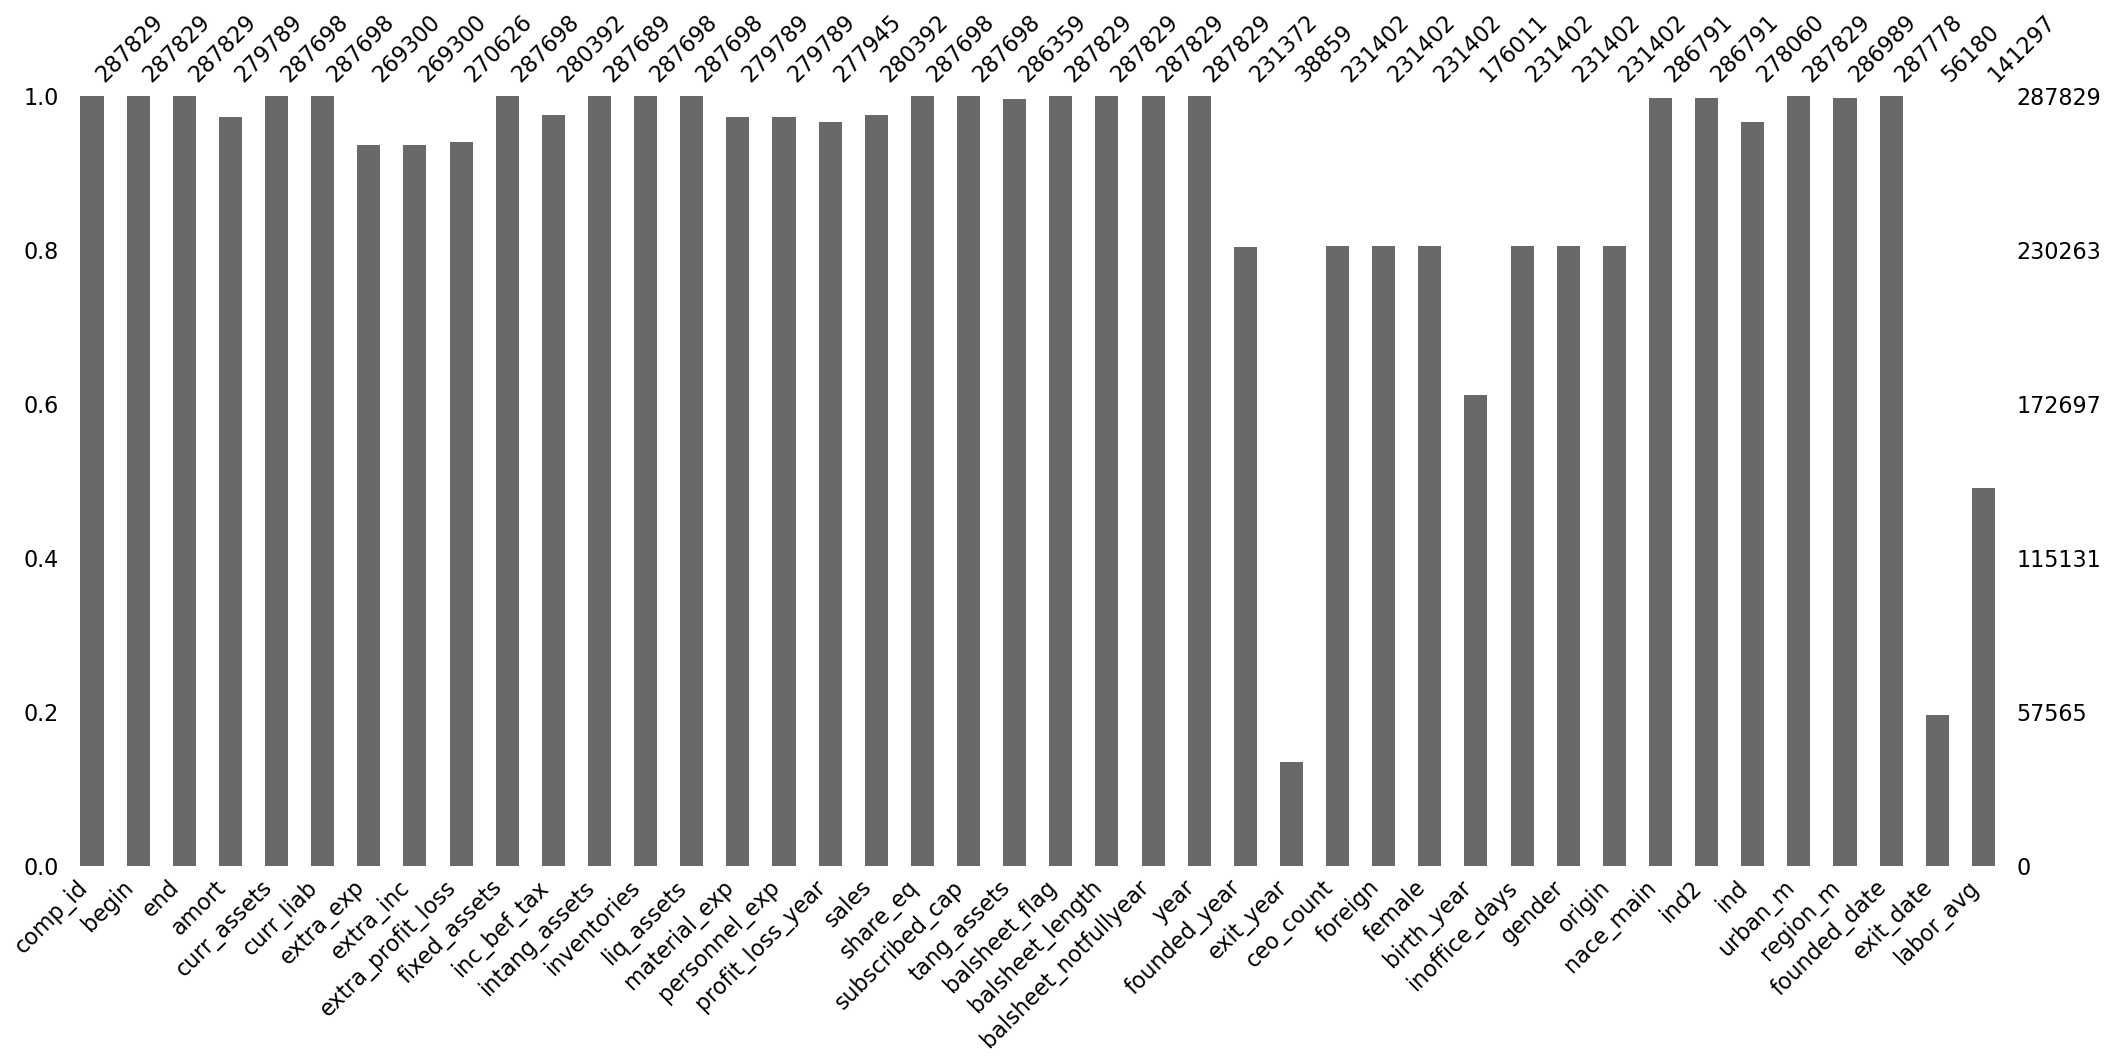

In [44]:
msno.bar(df)

Drop de Colunas com Alta quantidade de MissingValues

In [45]:
df.drop(columns={'exit_year','birth_year','exit_date','labor_avg'},inplace=True)

Filtro - retira dados de 2016

In [307]:
#Retira dados de 2016

df_filter = df[df['year']<2016]

In [308]:
df_filter['year'].value_counts()

2013    28474
2012    28469
2011    28222
2014    28151
2015    27506
2010    26784
2009    25596
2008    23733
2007    21804
2006    20200
2005    19147
Name: year, dtype: int64

Criar Coluna Solicitada : X+2

In [396]:
# Criando função que verifica o ano da linha mais 2 anos para o futuro.
visao_vendas = df_filter.groupby(['comp_id','year'])['sales'].sum().reset_index()

In [397]:
visao_vendas[visao_vendas['comp_id']==1001034]

,comp_id,year,sales
0,1001034.00,2005,62751.85
1,1001034.00,2006,64625.93
2,1001034.00,2007,65100.00
3,1001034.00,2008,78085.19
4,1001034.00,2009,45388.89
5,1001034.00,2010,9929.63
6,1001034.00,2011,0.00
7,1001034.00,2012,0.00
8,1001034.00,2013,0.00
9,1001034.00,2014,0.00


In [398]:
empresas = list(df['comp_id'].unique())

lista = list()

for empresa in empresas:
    filtro_empresa = (df['comp_id']==empresa) & (df['sales']>0)
    
    if filtro_empresa.any():
        maior_ano_positivo = df[filtro_empresa]['year'].max()
        lista=lista + [[empresa,maior_ano_positivo]]
        
    else:
        lista = lista + [[empresa,'0']]

In [399]:
df_ano = pd.DataFrame(lista,columns=['empresa','ano_max'])

df_ano['ano_max'] = df_ano['ano_max'].astype(int)

In [400]:
merge_1 = visao_vendas.merge(df_ano,right_on='empresa',left_on='comp_id',how='left')

merge_1['EmpresaInativou'] = np.where(merge_1['year']==merge_1['ano_max']+2,1,0)
merge_1['EmpresaInativou'] = np.where(merge_1['ano_max']==0,2,merge_1['EmpresaInativou'])

In [401]:
df_preditora = df_filter.merge(merge_1[['comp_id','year','EmpresaInativou']],right_on=['comp_id','year'],left_on=['comp_id','year'],how='left')

In [409]:
df_preditora.groupby(['year'])['EmpresaInativou'].sum()

year
2005    2218
2006    2102
2007    2412
2008    2583
2009    2700
2010    2831
2011    3315
2012    3397
2013    3572
2014    3671
2015    4345
Name: EmpresaInativou, dtype: int64

Filtrando empresas do ano de 2012 apenas

In [410]:
df_2012 = df_preditora[df_preditora['founded_year']==2012].reset_index()

In [412]:
df_2012['EmpresaInativou'].sum()

1153

In [403]:
df_2012['sales'] = np.where(df_2012['sales']<0,0,df_2012['sales'])

In [404]:
df_2012['sales_log'] = np.where(df_2012['sales']!=0,np.log2(df_2012['sales']),0)

#Quais outras colunas transformar?

/home/mariaukar/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [405]:
df_2012['company_age'] = df_2012['year'] - df_2012['founded_year']

In [ ]:
#COMO CALCULAR REVENUE??